# Read in raw metadata from the runs and crunch additional metadata

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [13]:
import os.path
from glob import glob
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import scmdata.database

from ndcs.constants import PROCESSED_DATA_DIR, NDC_TARGET_RELEASE

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [5]:
SCENARIO_LABELS = {
    "2021-11-09_1__high__C__SSP1BL__exclude": "A",
    "2021-11-09_1__low__U__SSP1BL__exclude": "B",
    "2021-11-09_1__high__C__2030__exclude": "a",
    "2021-11-09_1__high__C__2030__include": "b",
    "2021-11-09_1__low__C__2030__exclude": "c",
    "2021-11-09_1__low__C__2030__include": "d",
    "2021-11-09_1__high__U__2030__exclude": "e",
    "2021-11-09_1__low__U__2030__exclude": "f",
    "2021-11-09_1__high__U__2030__include": "g",
    "2021-11-09_1__low__U__2030__include": "h",
    # Methane scenarios
    "2021-11-09_1__high__C__SSP1BL__exclude_fullCH4": "m",
    "2021-11-09_1__high__C__SSP1BL__exclude_conditionalCH4": "n",
    "2021-11-09_1__high__C__SSP1BL__exclude_unconditionalCH4": "o",
    # A variants
    "2021-11-09_1__high__C__constant__exclude": "A-constant",
    "2021-11-09_1__high__C__rate__exclude": "A-rate",
    "2021-11-09_1__high__C__SSP1BL__include": "A-hot air",
}

<IPython.core.display.Javascript object>

In [6]:
DATE_CODE = "20220111"
FNAME = f"output_{NDC_TARGET_RELEASE}_sensitivity.csv"

<IPython.core.display.Javascript object>

# Fetch data from AWS

In [9]:
CLIMATE_ASSESSMENT_ID = f"{DATE_CODE}-ndc-sensitivity"
DATA_DIR_SENSITIVITY = os.path.join(
    PROCESSED_DATA_DIR, "climate_assessment", CLIMATE_ASSESSMENT_ID
)

!aws s3 sync s3://ipcc-climate-assessment/{CLIMATE_ASSESSMENT_ID}/merged {DATA_DIR}
!aws s3 sync s3://ipcc-climate-assessment/{CLIMATE_ASSESSMENT_ID}/out/raw_climate_output/ {DATA_DIR_SENSITIVITY}/raw_climate_output/

meta_files = glob(os.path.join(DATA_DIR_SENSITIVITY, "results_*.csv"))
meta_raw_sensitivity = pd.read_csv(sorted(meta_files)[-1])

<IPython.core.display.Javascript object>

# Load meta and calculate additional percentiles

In [10]:
meta_raw = meta_raw_sensitivity.reset_index(drop=True)
meta_raw.head()

,model,scenario,exclude,Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.5C (MAGICCv7.5.3),Exceedance Probability 3.0C (MAGICCv7.5.3),...,p67 warming in 2100 (MAGICCv7.5.3),Category,Category_name,harmonization,infilling,climate-models,pipeline
0,NDC Factsheet,2021-11-09_1__low__U__constant__exclude,False,0.920000,0.473333,0.136667,0.030000,...,2.128366,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
1,NDC Factsheet,2021-11-09_1__low__U__constant__include,False,0.938333,0.515000,0.173333,0.053333,...,2.204590,C5,C5: Below 2.5°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
2,NDC Factsheet,2021-11-09_1__high__U__constant__exclude,False,0.896667,0.435000,0.130000,0.026667,...,2.078221,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
3,NDC Factsheet,2021-11-09_1__high__U__constant__include,False,0.920000,0.483333,0.136667,0.033333,...,2.132572,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
4,NDC Factsheet,2021-11-09_1__high__C__rate__exclude,False,0.910000,0.456667,0.136667,0.030000,...,2.109929,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)


<IPython.core.display.Javascript object>

In [11]:
# drop peak warming and year of peak warming stats as they will be recalculated
cols = [
    c
    for c in meta_raw.columns
    if ("peak warming" not in c and "warming in 2100" not in c)
]
meta = meta_raw[cols]
cols = [c.replace("(MAGICCv7.5.3)", "") for c in cols]
meta.columns = cols
meta.head()

,model,scenario,exclude,Exceedance Probability 1.5C,Exceedance Probability 2.0C,Exceedance Probability 2.5C,Exceedance Probability 3.0C,Category,Category_name,harmonization,infilling,climate-models,pipeline
0,NDC Factsheet,2021-11-09_1__low__U__constant__exclude,False,0.920000,0.473333,0.136667,0.030000,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
1,NDC Factsheet,2021-11-09_1__low__U__constant__include,False,0.938333,0.515000,0.173333,0.053333,C5,C5: Below 2.5°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
2,NDC Factsheet,2021-11-09_1__high__U__constant__exclude,False,0.896667,0.435000,0.130000,0.026667,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
3,NDC Factsheet,2021-11-09_1__high__U__constant__include,False,0.920000,0.483333,0.136667,0.033333,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
4,NDC Factsheet,2021-11-09_1__high__C__rate__exclude,False,0.910000,0.456667,0.136667,0.030000,C4,C4: Below 2°C,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)


<IPython.core.display.Javascript object>

In [14]:
db_sensitivity = scmdata.database.ScmDatabase(
    os.path.join(DATA_DIR_SENSITIVITY, "raw_climate_output"),
    ["climate_model", "variable", "model", "scenario"],
)
db_sensitivity

<scmdata.database.SCMDatabase (root_dir: /home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/climate_assessment/20220111-ndc-sensitivity/raw_climate_output, levels: ('climate_model', 'variable', 'model', 'scenario'))>

<IPython.core.display.Javascript object>

In [15]:
temperatures_raw = db_sensitivity.load(variable="Raw Surface Temperature (GSAT)")

HIST_TEMP_REF_PERIOD = range(1850, 1900 + 1)
HIST_TEMP_EVALUATION_PERIOD = range(1995, 2014 + 1)
HIST_TEMP_ASSESSMENT_CENTRAL = 0.85

temperatures = temperatures_raw.relative_to_ref_period_mean(
    year=HIST_TEMP_REF_PERIOD
).drop_meta(["reference_period_start_year", "reference_period_end_year"])
temperatures = temperatures.adjust_median_to_target(
    HIST_TEMP_ASSESSMENT_CENTRAL,
    HIST_TEMP_EVALUATION_PERIOD,
    process_over=("run_id",),
).filter(year=range(2000, 2101))

Loading files:   0%|          | 0/32 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [16]:
percentiles = (
    (0.05, "p5"),
    (0.37, "p37"),
    (0.50, "median"),
    (0.067, "p67"),
    (0.95, "p95"),
)

<IPython.core.display.Javascript object>

In [17]:
stats = []

for r in temperatures.groupby("scenario"):
    scenario_stats = {
        "scenario": r.get_unique_meta("scenario", True),
    }

    for p, p_long in percentiles:
        scenario_stats["{} peak warming".format(p_long)] = (
            r.timeseries().max(axis=1).quantile(p)
        )

    for p, p_long in percentiles:
        scenario_stats["{} year of peak warming".format(p_long)] = (
            r.timeseries().idxmax(axis=1).quantile(p).year
        )

    for p, p_long in percentiles:
        scenario_stats["{} warming in 2100".format(p_long)] = (
            r.filter(year=2100).timeseries().squeeze().quantile(p)
        )
    stats.append(scenario_stats)
stats = pd.DataFrame(stats).set_index("scenario")

<IPython.core.display.Javascript object>

In [18]:
merged = pd.merge(meta, stats, left_on="scenario", right_on="scenario")

<IPython.core.display.Javascript object>

In [19]:
merged_cols = [
    "model",
    "scenario",
    "Category",
    "Category_name",
    "Exceedance Probability 1.5C ",
    "Exceedance Probability 2.0C ",
    "Exceedance Probability 2.5C ",
    "Exceedance Probability 3.0C ",
    "p5 peak warming",
    "p37 peak warming",
    "median peak warming",
    "p67 peak warming",
    "p95 peak warming",
    "p5 year of peak warming",
    "p37 year of peak warming",
    "median year of peak warming",
    "p67 year of peak warming",
    "p95 year of peak warming",
    "p5 warming in 2100",
    "p37 warming in 2100",
    "median warming in 2100",
    "p67 warming in 2100",
    "p95 warming in 2100",
    "harmonization",
    "infilling",
    "climate-models",
    "pipeline",
]
merged = merged[merged_cols]
merged

,model,scenario,Category,Category_name,Exceedance Probability 1.5C,Exceedance Probability 2.0C,Exceedance Probability 2.5C,...,median warming in 2100,p67 warming in 2100,p95 warming in 2100,harmonization,infilling,climate-models,pipeline
0,NDC Factsheet,2021-11-09_1__low__U__constant__exclude,C4,C4: Below 2°C,0.920000,0.473333,0.136667,...,1.862335,1.302359,2.874461,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
1,NDC Factsheet,2021-11-09_1__low__U__constant__include,C5,C5: Below 2.5°C,0.938333,0.515000,0.173333,...,1.931172,1.352094,2.971843,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
2,NDC Factsheet,2021-11-09_1__high__U__constant__exclude,C4,C4: Below 2°C,0.896667,0.435000,0.130000,...,1.795418,1.245285,2.805857,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
3,NDC Factsheet,2021-11-09_1__high__U__constant__include,C4,C4: Below 2°C,0.920000,0.483333,0.136667,...,1.866540,1.304290,2.881508,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
4,NDC Factsheet,2021-11-09_1__high__C__rate__exclude,C4,C4: Below 2°C,0.910000,0.456667,0.136667,...,1.847831,1.293226,2.845524,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
5,NDC Factsheet,2021-11-09_1__high__C__rate__include,C4,C4: Below 2°C,0.918333,0.470000,0.143333,...,1.932486,1.392582,2.895913,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
6,NDC Factsheet,2021-11-09_1__high__C__2030__exclude,C5,C5: Below 2.5°C,0.973333,0.711667,0.318333,...,2.149482,1.493260,3.328274,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
7,NDC Factsheet,2021-11-09_1__high__C__2030__include,C5,C5: Below 2.5°C,0.995000,0.838333,0.456667,...,2.324695,1.622606,3.554832,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
8,NDC Factsheet,2021-11-09_1__low__U__2030__exclude,C6,C6: Below 3.0°C,1.000000,0.955000,0.730000,...,2.674153,1.859353,4.087308,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)
9,NDC Factsheet,2021-11-09_1__low__U__2030__include,C7,C7: Below 4.0°C,1.000000,0.993333,0.856667,...,2.939594,2.057924,4.395152,aneris (version: 0.2.0+41.g6ddf6e5),silicone (version: 1.2.1),openscm_runner (version: 0.9.1),climate-assessment (version: 0.1.3-fgd+24.g0f1ec01)


<IPython.core.display.Javascript object>

In [20]:
merged.round(3).to_csv(
    os.path.join(PROCESSED_DATA_DIR, "stats_{}.csv".format(NDC_TARGET_RELEASE)),
    index=False,
)

<IPython.core.display.Javascript object>

In [21]:
# Combine output into a single file

<IPython.core.display.Javascript object>

In [31]:
all_files = []

for f in tqdm(meta_files):
    df = pd.read_excel(f)
    df["file"] = f
    all_files.append(df)
    
all_meta = pd.concat(all_files)


  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [32]:
all_meta[all_meta.duplicated("scenario", False)][["scenario", "file"]]["file"].unique()

array([], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
alloutput_files = [alloutput_files[i] for i in range(len(alloutput_files))]

<IPython.core.display.Javascript object>

In [34]:
len(alloutput_files)

8

<IPython.core.display.Javascript object>

In [35]:
alloutput_merged = scmdata.run_append(
    [scmdata.ScmRun(f, lowercase_cols=True) for f in tqdm(alloutput_files)]
)

  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [36]:
alloutput_merged.head()

time                                                                                                                                             1995-01-01  1996-01-01  1997-01-01  1998-01-01  1999-01-01  2000-01-01  2001-01-01  ...   2094-01-01  \
model         region scenario                             unit variable                                                                                                                                                              ...                
NDC Factsheet World  2021-11-09_1__high__C__2030__exclude ppb  AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|10.0th Pe...     1755.23     1757.19      1761.5     1770.29      1778.2     1778.01     1776.53  ...  1264.362042   
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|16.7th Pe...     1755.23     1757.19      1761.5     1770.29      1778.2     1778.01     1776.53  ...  1279.058601   
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|33.0th Pe...     1755.23     1757.19      1761.5     1770.29      1778.2     1778.01     1776.53  ...  1299.606005   
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|5.0th Per...     1755.23     1757.19      1761.5     1770.29      1778.2     1778.01     1776.53  ...  1248.493809   
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|50.0th Pe...     1755.23     1757.19      1761.5     1770.29      1778.2     1778.01     1776.53  ...  1315.192047   

time                                                                                                                                              2095-01-01   2096-01-01   2097-01-01   2098-01-01   2099-01-01   2100-01-01  
model         region scenario                             unit variable                                                                                                                                                        
NDC Factsheet World  2021-11-09_1__high__C__2030__exclude ppb  AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|10.0th Pe...  1258.510733  1252.858228  1247.067898  1241.147833  1235.108764  1228.844561  
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|16.7th Pe...  1273.123362  1267.347026  1261.433666  1255.391379  1249.266651  1243.042939  
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|33.0th Pe...  1293.739092  1288.026813  1282.140908  1276.143664  1270.190392  1264.019840  
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|5.0th Per...  1242.422883  1236.522005  1230.498486  1224.357804  1218.107194  1211.743860  
                                                               AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|50.0th Pe...  1309.405200  1303.722799  1297.914252  1292.046220  1286.050003  1279.837487  

[5 rows x 106 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
alloutput_cleaned["variable"] = [
    v[len("AR6 climate diagnostics|") :] for v in alloutput_merged["variable"]
]

<IPython.core.display.Javascript object>

In [39]:
# alloutput_cleaned.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [40]:
OUT_FNAME = os.path.join(DATA_DIR, "../merged", FNAME)
OUT_FNAME

'/home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/climate_assessment/20211112-ndc-sensitivity/../merged/output_12Nov2021a_CR_sensitivity.csv'

<IPython.core.display.Javascript object>

In [41]:
os.makedirs(os.path.dirname(OUT_FNAME), exist_ok=True)
alloutput_cleaned.to_csv(OUT_FNAME)

<IPython.core.display.Javascript object>

In [42]:
# Lets see how big the output is
!ls -lh {OUT_FNAME}

-rw-rw-r-- 1 jared jared 14M Jan 11 17:50 /home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/climate_assessment/20211112-ndc-sensitivity/../merged/output_12Nov2021a_CR_sensitivity.csv


<IPython.core.display.Javascript object>

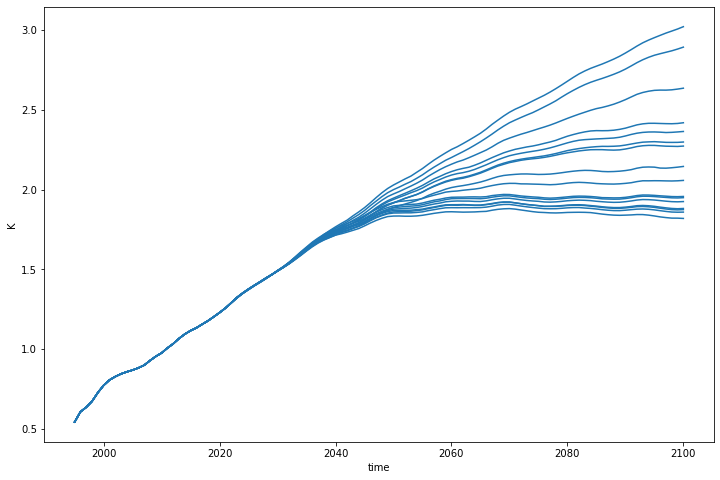

<IPython.core.display.Javascript object>

In [43]:
for v in ["Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile"]:
    plt.figure()

    alloutput_cleaned.filter(variable=v).lineplot(
        hue="variable", estimator=None, units="scenario", legend=False
    )

In [24]:
# alloutput_cleaned.filter(
#     pathway_id="2021-11-09_1",
#     variable="Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile",
# ).lineplot()

<IPython.core.display.Javascript object>